In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [32]:
data=pd.read_csv("/home/22n0457/multilabel_train_data.txt",sep=' ',header=None)

In [33]:
data

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,"6,7,11,12",1:-0.011858,2:-0.061636,3:0.054392,4:0.021137,5:0.089374,6:0.101825,7:-0.044525,8:0.222330,9:0.015575,...,95:-0.032930,96:-0.030487,97:0.009813,98:-0.002603,99:0.049288,100:-0.046913,101:-0.000844,102:0.004983,103:0.115765,NaN
1,"3,4,11,12",1:-0.018183,2:-0.045645,3:0.002001,4:0.066467,5:-0.118108,6:0.105399,7:0.004705,8:0.046744,9:-0.060929,...,95:-0.159394,96:0.125488,97:-0.149774,98:-0.148373,99:0.135500,100:0.047781,101:0.079903,102:0.065097,103:-0.165039,NaN
2,"4,5,6,7,10,11,12",1:0.074145,2:-0.044487,3:0.048191,4:-0.006614,5:0.042746,6:0.025960,7:0.021290,8:0.041714,9:0.048671,...,95:0.145222,96:-0.102574,97:0.143100,98:0.135860,99:-0.098214,100:-0.104915,101:-0.085630,102:0.174316,103:-0.022570,NaN
3,"1,2,9,10",1:0.044432,2:-0.007842,3:0.018440,4:0.036639,5:0.243409,6:0.154859,7:0.128655,8:0.122329,9:0.004179,...,95:0.011885,96:-0.052333,97:-0.056184,98:-0.056243,99:-0.049476,100:-0.056670,101:0.120910,102:-0.028053,103:0.086152,NaN
4,"1,2,11,12",1:0.051570,2:-0.016571,3:0.014702,4:0.024296,5:0.155760,6:0.048347,7:-0.031283,8:0.133782,9:0.085081,...,95:-0.086031,96:-0.098521,97:-0.086622,98:-0.091729,99:0.210266,100:0.110243,101:0.140546,102:0.182154,103:-0.101904,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,"0,1,11,12",1:-0.116754,2:-0.017859,3:-0.051158,4:0.015938,5:0.015013,6:0.121055,7:-0.099059,8:0.023402,9:0.005873,...,95:-0.125292,96:0.177598,97:-0.127144,98:-0.126141,99:0.046453,100:-0.070558,101:0.138768,102:-0.039471,103:-0.016383,NaN
1496,"3,4,11,12",1:0.085234,2:0.049690,3:0.134850,4:0.091247,5:0.239547,6:0.140304,7:0.166942,8:0.050181,9:0.126451,...,95:0.071134,96:-0.041950,97:0.076210,98:0.077935,99:-0.040123,100:-0.056090,101:-0.052238,102:-0.020390,103:0.085778,NaN
1497,"3,4,11,12",1:0.074028,2:0.014501,3:-0.041893,4:0.030209,5:-0.061547,6:0.022142,7:-0.022888,8:0.023375,9:0.073267,...,95:0.158470,96:-0.061079,97:0.188122,98:0.182037,99:-0.056295,100:-0.075996,101:-0.072424,102:-0.039109,103:0.019538,NaN
1498,"7,8",1:-0.058193,2:0.502205,3:-0.081411,4:-0.033651,5:0.001250,6:0.086514,7:-0.005469,8:0.033748,9:0.007124,...,95:-0.000601,96:-0.050850,97:-0.038719,98:0.178632,99:0.151786,100:-0.062065,101:-0.017584,102:0.498207,103:-0.072177,NaN


In [34]:
k=0
for i in range(data.shape[0]):
  for j in data.iloc[i,0].split(","):
    if int(j)>=k:
      k=int(j)
print('number of classes is',k+1)    

number of classes is 14


In [35]:
k=0
for i in range(data.shape[0]):
  for k in range(104):
    if len(data.iloc[i,k].split(":"))==2:
      p,q=data.iloc[i,k].split(":")
      if int(p)==0:
        print("0'th feature is available")
      if int(p)>=k:
        k=int(p)

In [36]:
print('number of feature in data is',k)

number of feature in data is 103


In [37]:
x=[]
y=[]
for i in range(data.shape[0]):
  x_=[0 for _ in range(103)]
  y_=[-1.0 for i in range(14)]
  for j in data.iloc[i,0].split(","):
    y_[int(j)]=1.0
  y.append(y_)
  for k in range(103):
    if len(data.iloc[i,k+1].split(":"))==2:
      p,q=data.iloc[i,k+1].split(":")
      x_[int(p)-1]=float(q)
  x.append(x_)


In [38]:
X_train=pd.DataFrame(x)

In [39]:
y_train=pd.DataFrame(y)

In [40]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.000353,-0.001520,-0.001909,-0.002978,-0.000532,-0.002823,0.001210,0.000519,0.003572,0.000608,...,-0.000753,0.001761,-0.002835,0.002865,0.001722,-0.001969,-0.001541,-0.001492,-0.001554,0.007882
std,0.095389,0.094026,0.096681,0.096793,0.096658,0.095889,0.098152,0.096910,0.096702,0.096203,...,0.094309,0.098443,0.094916,0.097962,0.097334,0.092869,0.097411,0.091851,0.093894,0.098463
min,-0.371146,-0.321144,-0.334314,-0.467945,-0.367044,-0.378560,-0.319928,-0.594498,-0.340749,-0.767128,...,-0.455191,-0.283594,-0.279408,-0.219918,-0.222457,-0.501572,-0.236589,-0.212692,-0.188325,-0.237752
25%,-0.054173,-0.059860,-0.057889,-0.061129,-0.060298,-0.061527,-0.058879,-0.062143,-0.057009,-0.060628,...,-0.054639,-0.057316,-0.057760,-0.058172,-0.057687,-0.053600,-0.064135,-0.059555,-0.057445,-0.074951
50%,0.006249,-0.004677,0.002054,-0.002050,0.003846,-0.004726,0.003024,0.003138,0.007208,0.003295,...,-0.012529,-0.022989,-0.024255,-0.021893,-0.021002,-0.017600,-0.034039,-0.023320,-0.013547,0.020297
75%,0.057060,0.045315,0.058905,0.050307,0.065514,0.057876,0.069973,0.062779,0.067854,0.063001,...,0.029015,0.042645,0.029925,0.048655,0.045165,0.021717,0.036108,0.026676,0.028467,0.102639
max,0.520272,0.502205,0.336984,0.478658,0.307649,0.335827,0.351401,0.454591,0.419852,0.420876,...,0.609175,0.445030,0.547134,0.379989,0.540493,0.494193,0.509963,0.587358,0.700340,0.156625


<AxesSubplot:>

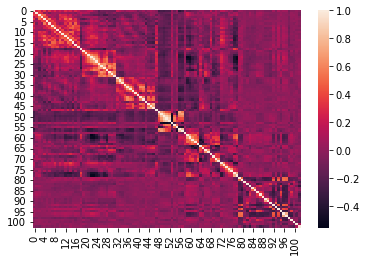

In [41]:
sns.heatmap(X_train.corr())

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_train, y_train, test_size=0.20, random_state=42)

In [43]:
def accuracy(y_prediction, y_actual):
    total_score = 0
    for pred, actual in zip(y_prediction, y_actual):
        intersect = np.intersect1d(pred,actual)
        union = np.union1d(pred,actual)
        score = len(intersect) / len(union) if len(union) > 0 else 0
        total_score += score

    return total_score / len(y_actual) if len(y_actual) > 0 else 0

In [44]:
def F1_score(y_prediction, y_actual):
    n = len(y_actual)
    intersection = [len(pred & act) for pred, act in zip(y_prediction, y_actual)]
    denominator = [len(pred) + len(act) for pred, act in zip(y_prediction, y_actual)]
    numerator = sum(intersection)
    return (1 / n) * sum(numerator / denom for numerator, denom in zip(intersection, denominator))

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
def Adaboost_fit(data_X, data_y, rounds):
    n = len(data_X)
    d = data_X.shape[1]
    w = np.full((n,), 1/n)
    weight = [w]
    alpha=[]
    epsilon=[]
    T = rounds
    classifiers = []
    y_preds = []
    
    for t in range(T):
        weak_classifier = DecisionTreeClassifier(max_depth=2)
        weak_classifier.fit(data_X, data_y, sample_weight=w)
        classifiers.append(weak_classifier)
        y_pred = weak_classifier.predict(data_X)
        y_preds.append(y_pred)
        epsilon_ = np.sum(w * (y_pred != data_y))
        epsilon.append(epsilon_)
        if epsilon_==0:
          break
        alpha_ = 0.5 * np.log((1 - epsilon_) / epsilon_)
        alpha.append(alpha_)
        exp_term = np.exp(-alpha_ * data_y * y_pred)
        w *= exp_term / np.sum(w * exp_term)
        weight.append(w)
        
    return alpha, weight, epsilon, classifiers

In [47]:
def AdaBoost_pred(data_X,alpha,classifiers):
  T=len(alpha)
  n=len(data_X)
  predictions=[]
  for i in range(T):
    predictions.append(classifiers[i].predict(data_X))
  pred=np.zeros(n)  
  for i in range(T):
    pred=pred+alpha[i]*predictions[i]
  return np.sign(pred)

In [48]:
label_arr=np.arange(14)

In [49]:
import numpy as np

def multitask_adaboost(X_train,y_train,X_test,y_test, k_values):
    seed_values = [0]
    results = []
    for k in k_values:
        f1_list = []
        acc_list = []
        global pred
        pred = pd.DataFrame()
        for i in range(14):
            y = y_train.iloc[:, i]
            alphas, weights, epsilons, classifiers = Adaboost_fit(X_train, y, k)
            y_pred = AdaBoost_pred(X_test, alphas, classifiers)
            pred[i]=y_pred
        f1_score = F1_score(pred.values.astype(int),y_test.values.astype(int))
        acc = accuracy(pred.values.astype(int),y_test.values.astype(int))
        results.append([k,f1_score,acc])
    return k_values[np.argmax(np.array(results)[:,1])],k_values[np.argmax(np.array(results)[:,2])],np.array(results)[:,1],np.array(results)[:,2]


In [50]:
best_k,k,f1_score,accuracy_sco=multitask_adaboost(X_train,y_train,X_test,y_test,[100,120,140,160,180,200,220,240,260,280,300])

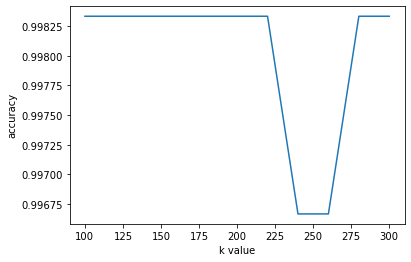

In [51]:
plt.plot([100,120,140,160,180,200,220,240,260,280,300],accuracy_sco)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()

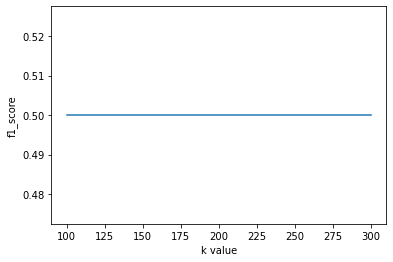

In [52]:
plt.plot([100,120,140,160,180,200,220,240,260,280,300],f1_score)
plt.xlabel("k value")
plt.ylabel("f1_score")
plt.show()

In [53]:
def multitask_Adaboost_training_model(data_X,data_y,k=best_k):
  alphas_labels=[]
  classifiers_labels=[]
  for i in range(14):
    y=data_y.iloc[:,i]
    alphas,weights,epsilons,classifiers=Adaboost_fit(data_X,y,k)
    y_pred=AdaBoost_pred(data_X,alphas,classifiers)
    accuracy=accuracy_score(y_pred,np.array(y))
    print(f'on train data with label{i}',accuracy)
    alphas_labels.append(alphas)
    classifiers_labels.append(classifiers)
  return alphas_labels,classifiers_labels 

In [54]:
alphas_labels,classifiers_labels=multitask_Adaboost_training_model(X_train,y_train)

on train data with label0 0.9591666666666666
on train data with label1 0.91
on train data with label2 0.9458333333333333
on train data with label3 0.965
on train data with label4 0.9633333333333334
on train data with label5 0.9441666666666667
on train data with label6 0.9858333333333333
on train data with label7 0.9825
on train data with label8 1.0
on train data with label9 1.0
on train data with label10 0.9991666666666666
on train data with label11 0.9475
on train data with label12 0.9
on train data with label13 1.0


In [55]:
def multitask_Adaboost_test_model(data_X,data_y,alphas=alphas_labels,classifiers=classifiers_labels):
  pred=pd.DataFrame()
  for i in range(14):
    alphas_lab=alphas[i]
    classifiers_lab=classifiers[i]
    y_pred=AdaBoost_pred(data_X,alphas_lab,classifiers_lab)
    print(f'individual accuracy of label {i}',accuracy_score(y_pred,data_y.iloc[:,i]))
    pred[i]=y_pred
  return pred  

In [56]:
predict=multitask_Adaboost_test_model(X_test,y_test)
print('accuracy is:',accuracy(predict.values.astype(int),y_test.values.astype(int)))
print('f1 score is:',F1_score(predict.values.astype(int),y_test.values.astype(int)))

individual accuracy of label 0 0.7633333333333333
individual accuracy of label 1 0.62
individual accuracy of label 2 0.76
individual accuracy of label 3 0.72
individual accuracy of label 4 0.7166666666666667
individual accuracy of label 5 0.7866666666666666
individual accuracy of label 6 0.8433333333333334
individual accuracy of label 7 0.7733333333333333
individual accuracy of label 8 0.9133333333333333
individual accuracy of label 9 0.8833333333333333
individual accuracy of label 10 0.89
individual accuracy of label 11 0.7333333333333333
individual accuracy of label 12 0.68
individual accuracy of label 13 0.98
accuracy is: 0.9983333333333333
f1 score is: 0.5


In [57]:
test=pd.read_csv("/home/22n0457/sample_multilabel_test_data.txt",sep=' ',header=None)

In [58]:
x=[]
y=[]
for i in range(test.shape[0]):
  x_=[0 for _ in range(103)]
  y_=[-1 for i in range(14)]
  for j in test.iloc[i,0].split(","):
    y_[int(j)]=1
  y.append(y_)
  for k in range(103):
    if len(test.iloc[i,k+1].split(":"))==2:
      p,q=test.iloc[i,k+1].split(":")
      x_[int(p)-1]=float(q)
  x.append(x_)

In [59]:
X_test=pd.DataFrame(x)
y_test=pd.DataFrame(y)

In [60]:
alphas_labels,classifiers_labels=multitask_Adaboost_training_model(X_train,y_train)

on train data with label0 0.9591666666666666
on train data with label1 0.91
on train data with label2 0.9458333333333333
on train data with label3 0.965
on train data with label4 0.9633333333333334
on train data with label5 0.9441666666666667
on train data with label6 0.9858333333333333
on train data with label7 0.9825
on train data with label8 1.0
on train data with label9 1.0
on train data with label10 0.9991666666666666
on train data with label11 0.9475
on train data with label12 0.9
on train data with label13 1.0


In [62]:
predict=multitask_Adaboost_test_model(X_test,y_test,alphas_labels,classifiers_labels)
print('accuracy is:',accuracy(predict.values.astype(int),y_test.values.astype(int)))
print('f1 score is:',F1_score(predict.values.astype(int),y_test.values.astype(int)))

individual accuracy of label 0 0.8
individual accuracy of label 1 0.58
individual accuracy of label 2 0.76
individual accuracy of label 3 0.64
individual accuracy of label 4 0.68
individual accuracy of label 5 0.58
individual accuracy of label 6 0.78
individual accuracy of label 7 0.82
individual accuracy of label 8 0.98
individual accuracy of label 9 0.84
individual accuracy of label 10 0.82
individual accuracy of label 11 0.6
individual accuracy of label 12 0.62
individual accuracy of label 13 0.98
accuracy is: 1.0
f1 score is: 0.5


In [86]:
def testing(file_name):
    test=pd.read_csv(file_name,sep=' ',header=None)
    x=[]
    y=[]
    for i in range(test.shape[0]):
      x_=[0 for _ in range(103)]
      y_=[-1 for i in range(14)]
      for j in test.iloc[i,0].split(","):
        y_[int(j)]=1
      y.append(y_)
      for k in range(103):
        if len(test.iloc[i,k+1].split(":"))==2:
          p,q=test.iloc[i,k+1].split(":")
          x_[int(p)-1]=float(q)
      x.append(x_)
    X_test=pd.DataFrame(x)
    y_test=pd.DataFrame(y)
    predict=multitask_Adaboost_test_model(X_test,y_test,alphas_labels,classifiers_labels)
    print('accuracy is:',accuracy(predict.values.astype(int),y_test.values.astype(int)))
    print('f1 score is:',F1_score(predict.values.astype(int),y_test.values.astype(int)))

In [95]:
 testing("/home/22n0457/sample_multilabel_test_data.txt")

individual accuracy of label 0 0.8
individual accuracy of label 1 0.58
individual accuracy of label 2 0.76
individual accuracy of label 3 0.64
individual accuracy of label 4 0.68
individual accuracy of label 5 0.58
individual accuracy of label 6 0.78
individual accuracy of label 7 0.82
individual accuracy of label 8 0.98
individual accuracy of label 9 0.84
individual accuracy of label 10 0.82
individual accuracy of label 11 0.6
individual accuracy of label 12 0.62
individual accuracy of label 13 0.98
accuracy is: 1.0
f1 score is: 0.5


In [88]:
import pickle

In [121]:
with open('/home/22n0457/IE506_22N0457_CHALLENGE_MODEL.pkl' ,'wb') as f:
    pickle.dump({"classifier":classifiers_labels,'alpha':alphas_labels}, f)

In [122]:
with open('/home/22n0457/IE506_22N0457_CHALLENGE_MODEL.pkl', 'rb') as f:
    vi = pickle.load(f)

# Run the below code and give test Data File Location and pkl File Location in testing Function To see Output 

In [110]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [111]:
def accuracy(y_prediction, y_actual):
    total_score = 0
    for pred, actual in zip(y_prediction, y_actual):
        intersect = np.intersect1d(pred,actual)
        union = np.union1d(pred,actual)
        score = len(intersect) / len(union) if len(union) > 0 else 0
        total_score += score

    return total_score / len(y_actual) if len(y_actual) > 0 else 0

In [112]:
def F1_score(y_prediction, y_actual):
    n = len(y_actual)
    intersection = [len(pred & act) for pred, act in zip(y_prediction, y_actual)]
    denominator = [len(pred) + len(act) for pred, act in zip(y_prediction, y_actual)]
    numerator = sum(intersection)
    return (1 / n) * sum(numerator / denom for numerator, denom in zip(intersection, denominator))

In [113]:
def multitask_Adaboost_test_model(data_X,data_y,alphas=alphas_labels,classifiers=classifiers_labels):
  pred=pd.DataFrame()
  for i in range(14):
    alphas_lab=alphas[i]
    classifiers_lab=classifiers[i]
    y_pred=AdaBoost_pred(data_X,alphas_lab,classifiers_lab)
    print(f'individual accuracy of label {i}',accuracy_score(y_pred,data_y.iloc[:,i]))
    pred[i]=y_pred
  return pred  

In [114]:
import numpy as np

def multitask_adaboost(X_train,y_train,X_test,y_test, k_values):
    seed_values = [0]
    results = []
    for k in k_values:
        f1_list = []
        acc_list = []
        global pred
        pred = pd.DataFrame()
        for i in range(14):
            y = y_train.iloc[:, i]
            alphas, weights, epsilons, classifiers = Adaboost_fit(X_train, y, k)
            y_pred = AdaBoost_pred(X_test, alphas, classifiers)
            pred[i]=y_pred
        f1_score = F1_score(pred.values.astype(int),y_test.values.astype(int))
        acc = accuracy(pred.values.astype(int),y_test.values.astype(int))
        results.append([k,f1_score,acc])
    return k_values[np.argmax(np.array(results)[:,1])],k_values[np.argmax(np.array(results)[:,2])],np.array(results)[:,1],np.array(results)[:,2]


In [115]:
def AdaBoost_pred(data_X,alpha,classifiers):
  T=len(alpha)
  n=len(data_X)
  predictions=[]
  for i in range(T):
    predictions.append(classifiers[i].predict(data_X))
  pred=np.zeros(n)  
  for i in range(T):
    pred=pred+alpha[i]*predictions[i]
  return np.sign(pred)

In [124]:
def testing(Test_file_location,pkl_file_Location):
    test=pd.read_csv(Test_file_location,sep=' ',header=None)
    with open(pkl_file_Location, 'rb') as f:
        vi = pickle.load(f)
    x=[]
    y=[]
    for i in range(test.shape[0]):
      x_=[0 for _ in range(103)]
      y_=[-1 for i in range(14)]
      for j in test.iloc[i,0].split(","):
        y_[int(j)]=1
      y.append(y_)
      for k in range(103):
        if len(test.iloc[i,k+1].split(":"))==2:
          p,q=test.iloc[i,k+1].split(":")
          x_[int(p)-1]=float(q)
      x.append(x_)
    X_test=pd.DataFrame(x)
    y_test=pd.DataFrame(y)
    predict=multitask_Adaboost_test_model(X_test,y_test,alphas_labels,classifiers_labels)
    print('accuracy is:',accuracy(predict.values.astype(int),y_test.values.astype(int)))
    print('f1 score is:',F1_score(predict.values.astype(int),y_test.values.astype(int)))

# Code input Give Here

In [125]:
testing("/home/22n0457/sample_multilabel_test_data.txt",'/home/22n0457/IE506_22N0457_CHALLENGE_MODEL.pkl')

individual accuracy of label 0 0.8
individual accuracy of label 1 0.58
individual accuracy of label 2 0.76
individual accuracy of label 3 0.64
individual accuracy of label 4 0.68
individual accuracy of label 5 0.58
individual accuracy of label 6 0.78
individual accuracy of label 7 0.82
individual accuracy of label 8 0.98
individual accuracy of label 9 0.84
individual accuracy of label 10 0.82
individual accuracy of label 11 0.6
individual accuracy of label 12 0.62
individual accuracy of label 13 0.98
accuracy is: 1.0
f1 score is: 0.5
